# Comparison of various numerical integration methods over runge function 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import Callable

In [20]:
def runge_fun(x):
    return 1/(1 + 25 * x**2)

 Definite integral of runge_fun from -1 to 1, calculated manualy


In [21]:
actual_integral = 2 * np.arctan(5) * .2 

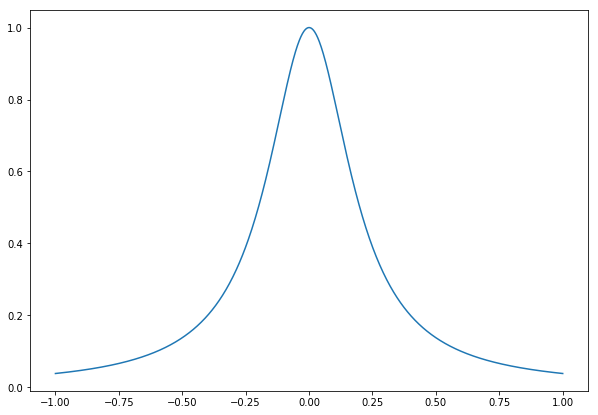

In [22]:
x_samples = np.linspace(-1, 1, 1024)
y_samples = runge_fun(x_samples)

plt.close()
plt.figure(figsize=(10,7))
plt.plot(x_samples, y_samples)
plt.show()

In [23]:
def sampling_integration(fun: Callable[[float], float], left: float, right: float, n_samples: int = 10000) -> float:
    samples = np.linspace(left, right, n_samples)
    avg_val = np.mean(fun(samples))
    return (right-left) * avg_val

In [24]:
def monte_carlo(fun: Callable[[float], float], left: float, right: float, n_samples: int = 10000, n: int = 100) -> float:
    results = np.array([])
    for i in range(n):
        samples = np.random.uniform(left, right, n_samples)
        avg_val = np.mean(fun(samples))
        results = np.append(results, [(right-left) * avg_val], axis=0)
    return np.mean(results)

In [25]:
def trapezoid_cubature(fun: Callable[[float], float], left: float, right: float, n_samples: int = 10000) -> float:
    samples = np.linspace(left, right, n_samples)
    integral = .0
    for i in range(1, n_samples):
        x1 = samples[i - 1]
        x2 = samples[i]
        integral += ( fun(x2) + fun(x1) ) * .5 * (x2 - x1)   
    return integral

In [30]:
def simpson(fun: Callable[[float], float], left: float, right: float, n = 15000):
    samples = np.linspace(left, right, n)
    integral = .0
    for i in range(2, n, 2):
        x1 = samples[i - 2]
        x2 = samples[i - 1]
        x3 = samples[i]
        integral += ((x2 - x1) / 3) * (fun(x1) + 4*fun(x2) + fun(x3))
    return integral

In [37]:
def adaptive_simpson(fun: Callable[[float], float], left: float, right: float, eps = 1e-15, max_iter = 10000):
    h = (right - left) / 2
    stack = [(left, h, fun(left), fun(left + h), fun(left + 2*h), h*(fun(left) + 4*fun(left + h) + fun(left + 2*h)) / 3.0)]
    result = .0
    counter = 0
    while stack:
        counter += 1
        l, h, fl, fm, fr, integral = stack.pop()
        lm = l + h/2
        flm = fun(lm)
        lm_integral = h*(fl + flm * 4 + fm) / 6.0
        rm = l + 3*h/2
        frm = fun(rm)
        rm_integral = h*(fm + frm * 4 + fr) / 6.0
        error = lm_integral + rm_integral - integral
        if np.abs(error) < 30 * eps * h / (right - left):
            result += rm_integral + lm_integral + error / 15.0
        else:
            if counter > max_iter: raise ArithmeticError("Could not reach desired precision")
            stack.append((l, h/2.0, fl, flm, fm, lm_integral))
            stack.append((l + h, h/2.0, fm, frm, fr, rm_integral))
    return (result, counter)

In [50]:
print("Sampling error: ", actual_integral - sampling_integration(runge_fun, -1, 1))
print("Monte Carlo error: ", actual_integral - monte_carlo(runge_fun, -1, 1, n=1000))
print("Trapezoid error: ", actual_integral - trapezoid_cubature(runge_fun, -1, 1))
print("Simpson error: ", actual_integral - simpson(runge_fun, -1, 1))
x, n = adaptive_simpson(runge_fun, -1, 1, eps=1e-10)
print(f"Adaptive Simpson error: {actual_integral - x}, reached in {n} iteration")

Sampling error:  4.7244216131447914e-05
Monte Carlo error:  0.00010060622069785197
Trapezoid error:  4.931928199169988e-10
Simpson error:  5.129204663334441e-06
Adaptive Simpson error: 5.440092820663267e-14, reached in 559 iteration
